In [43]:
import random as rd
import matplotlib.pyplot as plt

Beginning Assignment 1

1. One-max problem.
Consider the simple case of evolving a string that contains all 1s in every location. Let the
length of the strings be 30.
The initial population should be randomly created. Use standard mutation and one-point
crossover. 
The fitness of a solution is the number of 1s in the string.
Plot the average fitness of the population versus the generations passed.
This exercise is to show the operation of a genetic algorithm. Clearly, we know the
optimal solution in advance.

In [44]:
def calc_fitness(input_string):
    return input_string.count("1")

In [45]:
def update_fitness(population):
    cumulative_fitness = 0
    for person in population:
        person["fitness"]=calc_fitness(person["dna"])
        cumulative_fitness += person["fitness"]
    return cumulative_fitness/len(population) #return the average fitness for this generation.

In [46]:
##randomly initialising the population
def initialise_population(pop_size,length_of_dna,possible_dna_values):
    population=[]
    max_dna_value=max(possible_dna_values)
    min_dna_value=min(possible_dna_values)
    for j in range(pop_size):
        initial=""

        for i in range(0,length_of_dna):
            initial+= str(rd.randint(min_dna_value,max_dna_value))
            #making a dict for each gladiator.
        gladiator={"dna":initial,"fitness":calc_fitness(initial),"losses":0, "wins":0}

        population.append(gladiator)

    update_fitness(population)

    return population # returning a list of generated populations

In [47]:
#a "fight" is just fitness of x vs fitness of y. The gladiator with greater fitness "wins"
#winner moves on to the next generation. Losers?

def fight(gladiators): #gladiators is a list of gladiators.
    currWinner = gladiators[0]
    for i in range(1, len(gladiators)):
        if gladiators[i]["fitness"] > currWinner["fitness"]:
            currWinner = gladiators[i]
    return currWinner

In [48]:
#returns strongest_gladiators with size population/tournament_size
def tournament_selection(tournament_size,population):
    
    strongest_gladiators=[]
    num_fights=round(len(population)/tournament_size)
    for i in range(0, num_fights):

        #giving fighters a pass
        if (len(population)<tournament_size):
            strongest_gladiators.append(population)
            print("Not enough fighters")
            return strongest_gladiators
           

        #print("Before fight",len(population))
        
        #randomly choosing tournament_size fighters to fight
        gladiators_to_fight=rd.sample(population,tournament_size) #has issues on large tournament size


        #getting the winner of the fight and adding him to winners list
        strongest_gladiators.append(fight(gladiators_to_fight)) 

        #remove combatants from population
        for gladiator in gladiators_to_fight:
            population.remove(gladiator)

    return strongest_gladiators

In [49]:
#The Mutation function

def mutation(population,mutation_possibilities):

    for person in population:

        dna_to_mutate=person["dna"]
        new_dna=[] #list to create the mutated dna
        for i in range(0,len(dna_to_mutate)):
           
            if(rd.randint(0,10)<2): #chance to mutate (20% by default)
                mutation_char=mutation_possibilities[rd.randint(0,len(mutation_possibilities)-1)]
                new_dna.append(str(mutation_char) ) #what it mutates to
            else:
                new_dna.append(str(dna_to_mutate[i]))
    
        person["dna"]="".join(new_dna)
    
    return population

In [50]:
#The Cross-over function
def cross_over_two_parents(parents, dna_length):
    dna_parent_one=parents[0]["dna"]
    dna_parent_two=parents[1]["dna"]
    cross_over_index = rd.randint(0, dna_length-1)
    slice_one = slice(cross_over_index)
    slice_two = slice(cross_over_index, dna_length)

    children = []

    ###NOTE: @Blake, shouldn't each Child be a gladiator object?. They just can't be strings. I've made the change
   
    #children.append(dna_parent_one[slice_one]+dna_parent_two[slice_two])
    #children.append(dna_parent_two[slice_one]+dna_parent_one[slice_two])
    dna_child1=str(dna_parent_one[slice_one])+str(dna_parent_two[slice_two])
    dna_child2=str(dna_parent_two[slice_one])+str(dna_parent_one[slice_two])
    
    child1={"dna":dna_child1,"fitness":calc_fitness(dna_child1),"losses":0, "wins":0}
    child2={"dna":dna_child2,"fitness":calc_fitness(dna_child2),"losses":0, "wins":0}

    children.append(child1)
    children.append(child2)
    
    return children

Graph generation code below:

In [51]:
#Plot the average fitness of the population versus the generations passed.
def generate_graph(average_fitness_list, length):
    plt.xlabel("Average Fitness of Population")
    plt.ylabel("Generations Passed")
    plt.title("Plotting average fitness of population against Generations passed")

    print(f"Max fitness value identified: {max(average_fitness_list)}")

    generations=list(range(0,length))
    #for i in range (0,len(average_fitness_list)):
        #plt.plot(average_fitness_list[i],i,"-",marker="D")

    plt.plot(average_fitness_list,generations,"-",marker="D")
    plt.show()

In [52]:
def convergence(population,optimal_dna):
    for person in population:
        if(person["dna"]==optimal_dna):
            return 1

    return 0

Max fitness value identified: 19.65


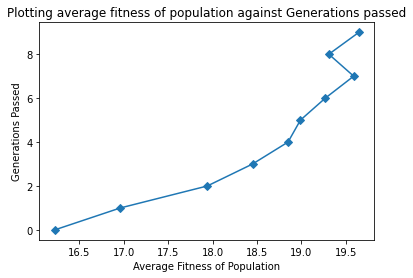

In [53]:
generations_passed=0
max_generations=10
tournament_size=2
chance_to_mutate=0#do this
possible_dna_values=[0,1]
dna_length=30

optimal_dna="1"*dna_length
#possible_dna_values=range(0,10)
original_population=100
average_fitness_list=[]

population= initialise_population(original_population,dna_length,possible_dna_values)

while(generations_passed<max_generations):
    winners=tournament_selection(tournament_size,population)
    population=winners

    #cross-over winners
    children=cross_over(population,dna_length,original_population)

    #print("Kids returned:",len(children))
    
    ##add their kids back into population  
    # NOTE: @Blake, population will not be maintained as for x parents, only x/2 kids are generated (not x kids0)
    for child in children:
         population.append(child)

    #print("Population after kids",len(population))
    #mutate population
    population=mutation(population,possible_dna_values)

    average_fitness_list.append(update_fitness(population))

    ##increase generations_passed
    generations_passed+=1
    #if perfect fitness then break or max_generations reached break
    
    if(convergence(population,optimal_dna)): #if convergence has been reached, break out of the loop

        print("Converged!")        
        break

generate_graph(average_fitness_list,len(average_fitness_list))